In [96]:
# %pip install numpy
# %pip install rich
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy.stats
# %pip install scikit-learn


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from rich import print

In [98]:
filename="csv/Liver Patient Dataset.csv"
data= pd.read_csv(filename, encoding='unicode_escape')
data.set_index("ID")

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code
ID,,,,,,,,,,,,
ID_001,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15
ID_002,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11
ID_003,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28
ID_004,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27
ID_005,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24
...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11
ID_30674,45.0,Male,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15
ID_30675,60.0,Female,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24


In [99]:
state= pd.read_csv("csv/Statecode_name.csv")
status= pd.read_csv("csv/Status.csv")
city= pd.read_csv("csv/Cityname_statecode.csv")

In [100]:
state.rename(columns={"State Code":"State_Code"},inplace=True)
state=state.set_index("State_Code")
city.rename(columns={"City Code":"City_Code"},inplace=True)
city=city.set_index("City_Code")
status.replace(2, 0, inplace=True)
city


,State Code,City name
City_Code,,
CT01,ST15,Mumbai
CT02,ST15,Pune
CT03,ST24,Chennai
CT04,ST24,Coimbatore
CT05,ST25,Hyderabad
CT06,ST22,Jaipur
CT07,ST13,Kochi
CT08,ST29,Kolkata
CT09,ST34,Delhi


In [101]:
merge_data=pd.merge(data, state, on='State_Code', how='left')
merge_data=pd.merge(merge_data, city[["City name"]], on='City_Code', how='left')
merge_data=pd.merge(merge_data, status, on='ID', how='outer')

In [102]:
merge_data=merge_data.set_index("ID")


In [103]:
merge_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_001,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11,Jharkhand,Ranchi,0
ID_30674,45.0,Male,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_30675,60.0,Female,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24,Tamil Nadu,Coimbatore,0


In [104]:
merge_data.loc[merge_data["Gender of the patient"]=="Female","Gender of the patient"]=1 
merge_data.loc[merge_data["Gender of the patient"]=="Male","Gender of the patient"]=0 
merge_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_001,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,1,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11,Jharkhand,Ranchi,0
ID_30674,45.0,0,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_30675,60.0,1,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24,Tamil Nadu,Coimbatore,0


In [105]:
merge_data["Status"]=merge_data["Status"]
merge_data["Gender of the patient"]=merge_data["Gender of the patient"].astype('category')
merge_data["Age of the patient"]=pd.to_numeric(merge_data["Age of the patient"],errors='coerce')

merge_data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Status
count,30675.000000,30033.000000,30119.000000,29880.000000,30139.000000,30214.000000,30213.000000,30183.000000,30118.000000,30677.000000
mean,44.107971,3.370629,1.528225,289.048293,81.479711,111.453531,6.480363,3.130249,0.943503,0.714118
std,15.981066,6.256466,2.870060,238.570823,182.184895,280.898133,1.082075,0.792355,0.323197,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


# Any affect of age group on the occurrence of liver disease.

In [106]:
correlation_matrix = merge_data[["Age of the patient","Status"]].corr(method='pearson',numeric_only=True)
liver_d_corr_with_age = correlation_matrix["Status"].sort_values(ascending=False)
print(liver_d_corr_with_age)
print("\nAny affect of age group on the occurrence of liver disease?", liver_d_corr_with_age["Age of the patient"]>0.1)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

# Any relationship between different factors and with the presence of liver disease given in the dataset.


In [107]:
correlation_matrix = merge_data.corr(method='pearson',numeric_only=True)
liver_d_corr = correlation_matrix["Status"].sort_values(ascending=False)

print(liver_d_corr)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True , cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

## is there any corelation between Gender of the patient and presence of liver disease

In [108]:

CrosstabResult=pd.crosstab(index=merge_data['Gender of the patient'],columns=merge_data['Status'])
print(CrosstabResult) 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value < 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(ChiSqResult[1]<0.05)

Status                    0      1
Gender of the patient             
0                      6243  15734
1                      2250   5552

The P-Value of the ChiSq Test is: 0.47704077555129487

False

In [ ]:
CrosstabResult=pd.crosstab(index=merge_data['State Name'],columns=merge_data['Status'])
print(CrosstabResult) 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value < 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(ChiSqResult[1]<0.05)

Status            0     1
State Name               
Andhra Pradesh  301   790
Bihar           289   705
Delhi           370   868
Gujarat         872  2193
Jharkhand       607  1432
Karnataka       908  2324
Kerala          605  1534
Madhya Pradesh  274   737
Maharashtra     918  2270
Odisha          272   714
Punjab          277   687
Rajasthan       303   757
Sikkim          304   687
Tamil Nadu      983  2410
Telangana       274   739
Uttar Pradesh   601  1539
Uttarakhand     304   790
West Bengal     308   731

The P-Value of the ChiSq Test is: 0.9058504191381113

False

In [79]:
merge_data.to_csv("merge_data.csv")

# Is the dataset balanced?

In [80]:
target_distribution = merge_data['Status'].value_counts()

# Check for missing values and duplicates
is_dataset_balanced = target_distribution.min() / target_distribution.max() > 0.8
has_missing_values = merge_data.isnull().values.any()
has_duplicates = merge_data.duplicated().any()

print("Target Distribution: where 1 indicates Liver Patient, 0 indicates not Liver Patient")
print(target_distribution)

print("\nIs the dataset balanced?", is_dataset_balanced)



Target Distribution: where 1 indicates Liver Patient, 0 indicates not Liver Patient

1    21907
0     8770
Name: Status, dtype: int64

Is the dataset balanced? False

# Any missing values?

In [81]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Age of the patient                        2
Gender of the patient                   898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
dtype: int64

In [82]:
print("Any missing values?", has_missing_values)
merge_data.loc[merge_data.isnull().any(axis=1)==True]

Any missing values? True

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_007,26.0,1,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,CT06,ST22,Rajasthan,Jaipur,1
ID_013,64.0,0,0.9,NaN,NaN,61.0,58.0,7.0,3.4,0.90,CT04,ST24,Tamil Nadu,Coimbatore,0
ID_015,61.0,0,0.7,0.2,145.0,53.0,NaN,NaN,2.7,0.87,CT16,ST23,Sikkim,Gangtok,1
ID_022,51.0,0,2.9,1.3,482.0,22.0,NaN,7.0,2.4,0.50,CT22,ST14,Madhya Pradesh,Indore,1
ID_023,62.0,0,NaN,3.0,542.0,116.0,66.0,6.4,3.1,0.90,CT18,ST21,Punjab,Ludhiana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30641,44.0,1,7.3,NaN,NaN,NaN,NaN,NaN,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_30642,36.0,1,1.0,NaN,NaN,NaN,NaN,NaN,3.4,1.00,CT01,ST15,Maharashtra,Mumbai,1
ID_30643,42.0,NaN,3.9,NaN,NaN,NaN,NaN,NaN,2.4,0.40,CT11,ST07,Gujarat,Ahmedabad,1


In [83]:

# Fixing Missing Value
from sklearn.linear_model import LinearRegression

df_corr=merge_data.dropna(subset=["Total Bilirubin", "Direct Bilirubin"])
x=df_corr[["Total Bilirubin"]]
y=df_corr[["Direct Bilirubin"]]

model=LinearRegression()
model.fit(x,y)
def temp(row):
    if not pd.isnull(row["Direct Bilirubin"]): 
        return row["Direct Bilirubin"]
    elif pd.isnull(row["Direct Bilirubin"]) and pd.isnull(row["Total Bilirubin"]):
        return row["Direct Bilirubin"] 
    else: 
        return model.predict([[row["Total Bilirubin"]]])[0]
    

merge_data["Direct Bilirubin"]=merge_data.apply(temp,axis=1)

model.fit(y,x)
def temp(row):
    if not pd.isnull(row["Total Bilirubin"]): 
        return row["Total Bilirubin"]
    elif pd.isnull(row["Direct Bilirubin"]) and pd.isnull(row["Total Bilirubin"]):
        return row["Total Bilirubin"] 
    else: 
        return model.predict([[row["Direct Bilirubin"]]])[0]
    

merge_data["Total Bilirubin"]=merge_data.apply(temp,axis=1)

/Users/swarajpurohit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/swarajpurohit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/swarajpurohit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/swarajpurohit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/swarajpurohit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

In [84]:
print("Are there duplicate records?", has_duplicates)
#merge_data[merge_data.duplicated()==True]
merge_data.loc[merge_data.duplicated(keep='first')==True]

Are there duplicate records? True

TypeError: unhashable type: 'numpy.ndarray'

In [59]:
merge_data["Total Bilirubin"].fillna(merge_data["Total Bilirubin"].median(),inplace=True)
merge_data["Direct Bilirubin"].fillna(merge_data["Direct Bilirubin"].median(),inplace=True)
merge_data["Alkphos Alkaline Phosphotase"].fillna(merge_data["Alkphos Alkaline Phosphotase"].median(),inplace=True)
merge_data["Sgpt Alamine Aminotransferase"].fillna(merge_data["Sgpt Alamine Aminotransferase"].median(),inplace=True)
merge_data["Sgot Aspartate Aminotransferase"].fillna(merge_data["Sgot Aspartate Aminotransferase"].mean(),inplace=True)
merge_data["Total Protiens"].fillna(merge_data["Total Protiens"].mean(),inplace=True)
merge_data["ALB Albumin"].fillna(merge_data["ALB Albumin"].mean(),inplace=True)
merge_data["A/G Ratio Albumin and Globulin Ratio"].fillna(merge_data["A/G Ratio Albumin and Globulin Ratio"].mean(),inplace=True)
merge_data["Age of the patient"].fillna(merge_data["Age of the patient"].mean(),inplace=True)
merge_data["Gender of the patient"].fillna(1,inplace=True)

In [60]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]
merge_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_001,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,1,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11,Jharkhand,Ranchi,0
ID_30674,45.0,0,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_30675,60.0,1,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24,Tamil Nadu,Coimbatore,0


# Are there duplicate records?

In [61]:
print("Are there duplicate records?", has_duplicates)
#merge_data[merge_data.duplicated()==True]
merge_data.loc[merge_data.duplicated(keep='first')==True]

Are there duplicate records? True

TypeError: unhashable type: 'numpy.ndarray'

IndexError: index 12 is out of bounds for axis 0 with size 12

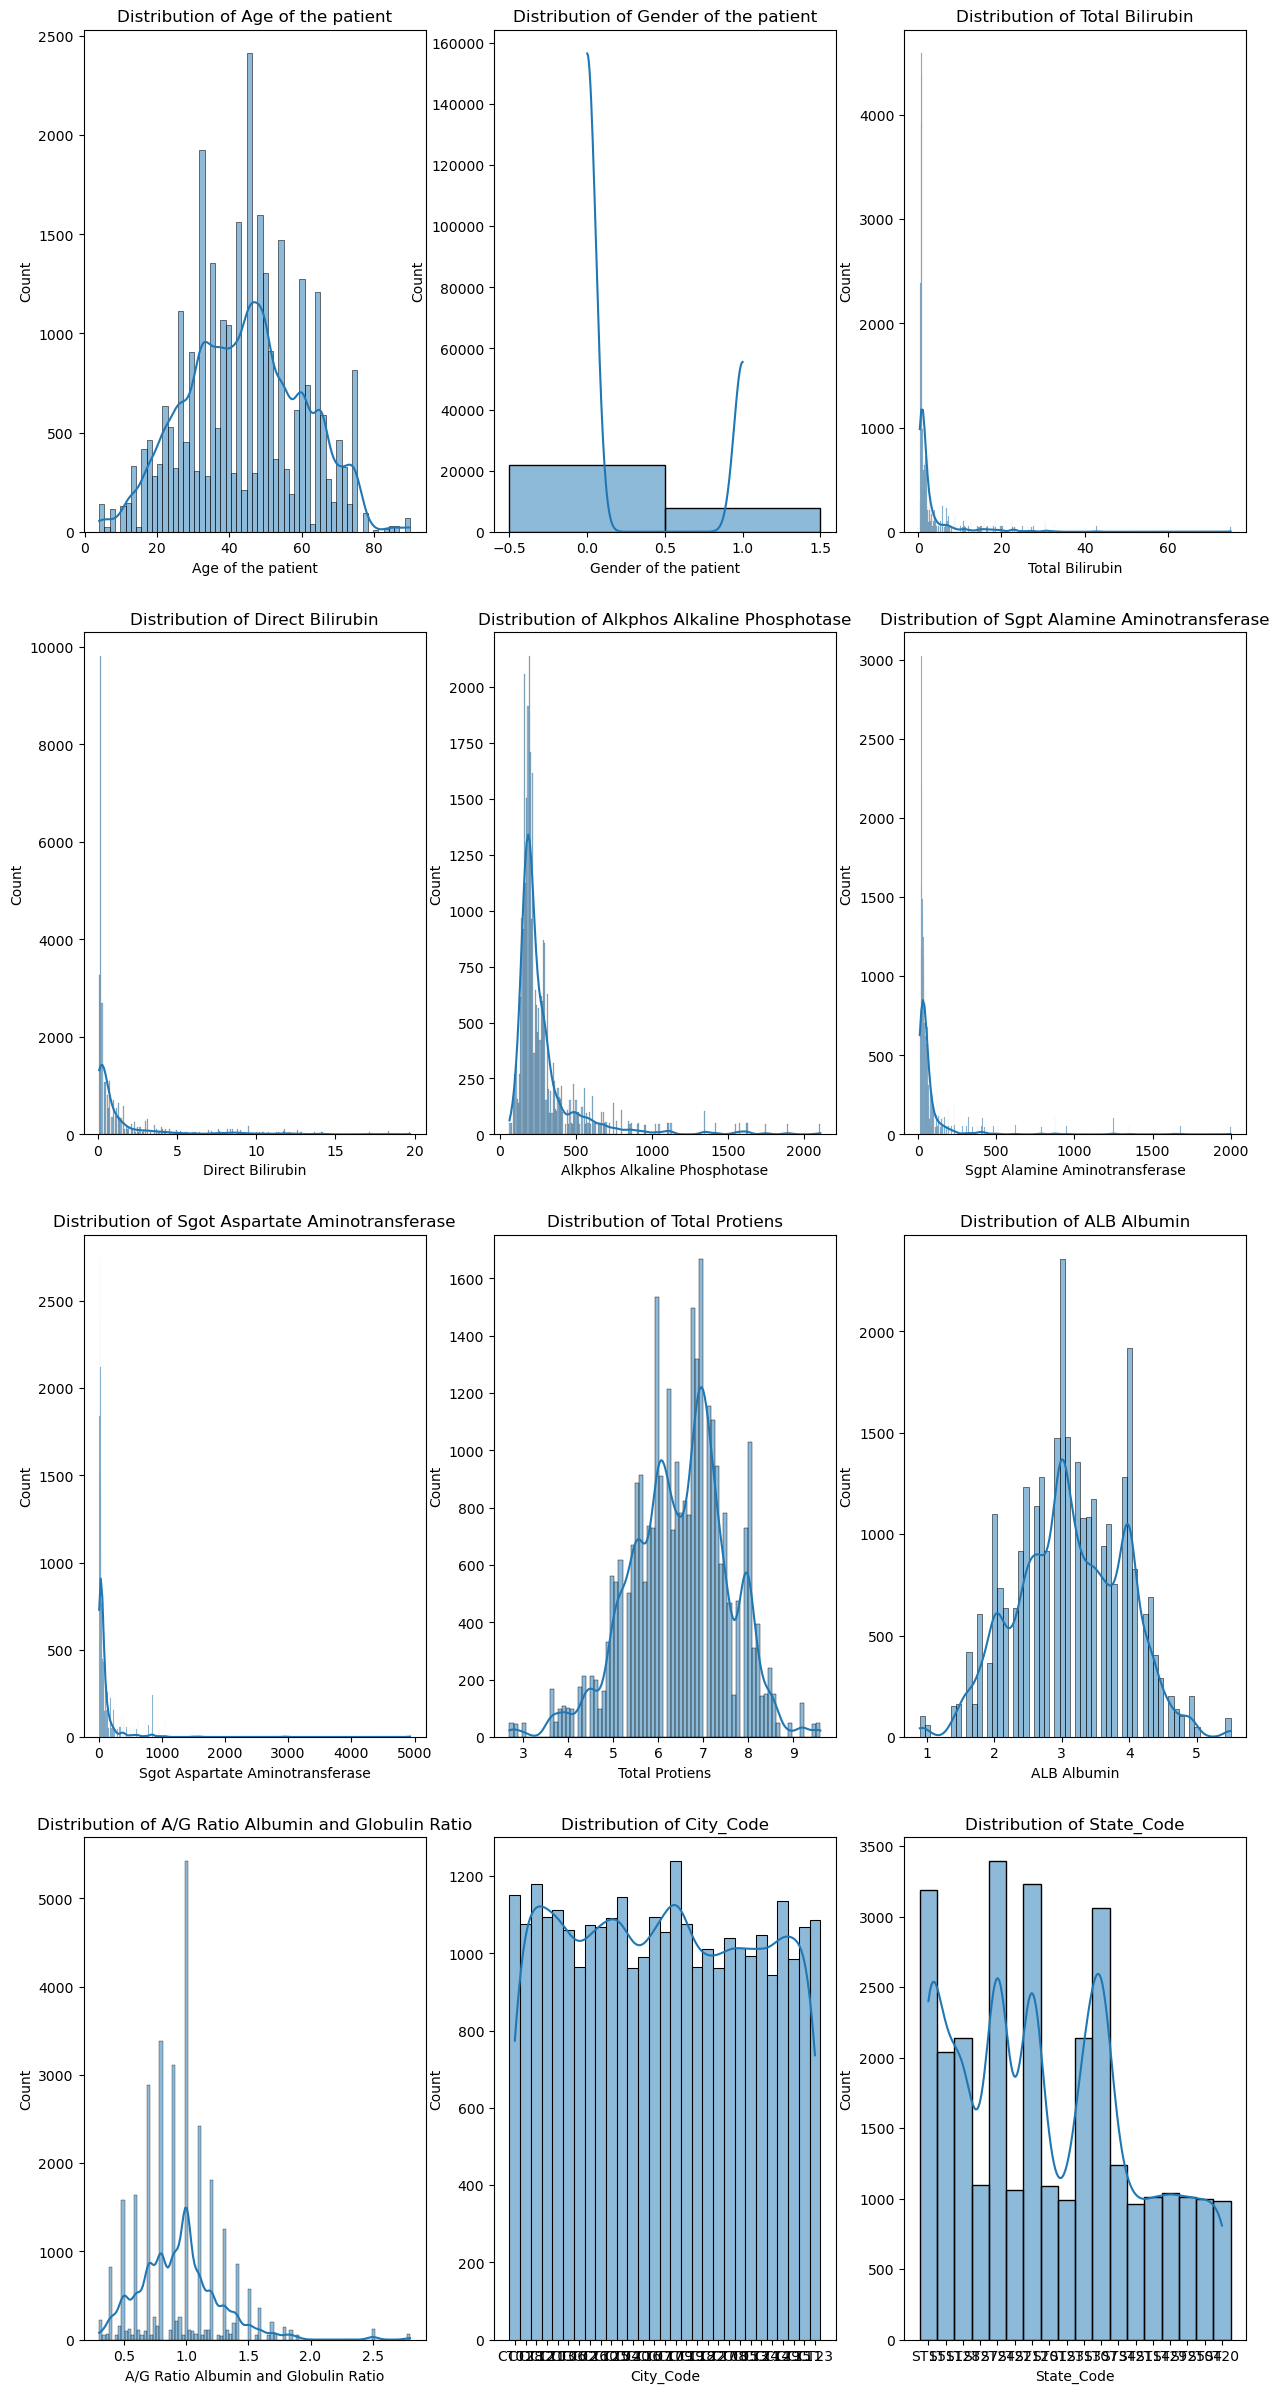

In [109]:
num_cols = len(merge_data.columns)
num_rows = 4
cols_per_row = 3


num_subplot_rows = -(-num_cols // cols_per_row)  # Equivalent to math.ceil(num_cols / cols_per_row)

# Create a single graph with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 30))

# Flatten the 2D array of subplots for easy indexing
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(merge_data.columns):
    sns.histplot(merge_data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if there are fewer columns than expected
for j in range(num_cols, num_rows * cols_per_row):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

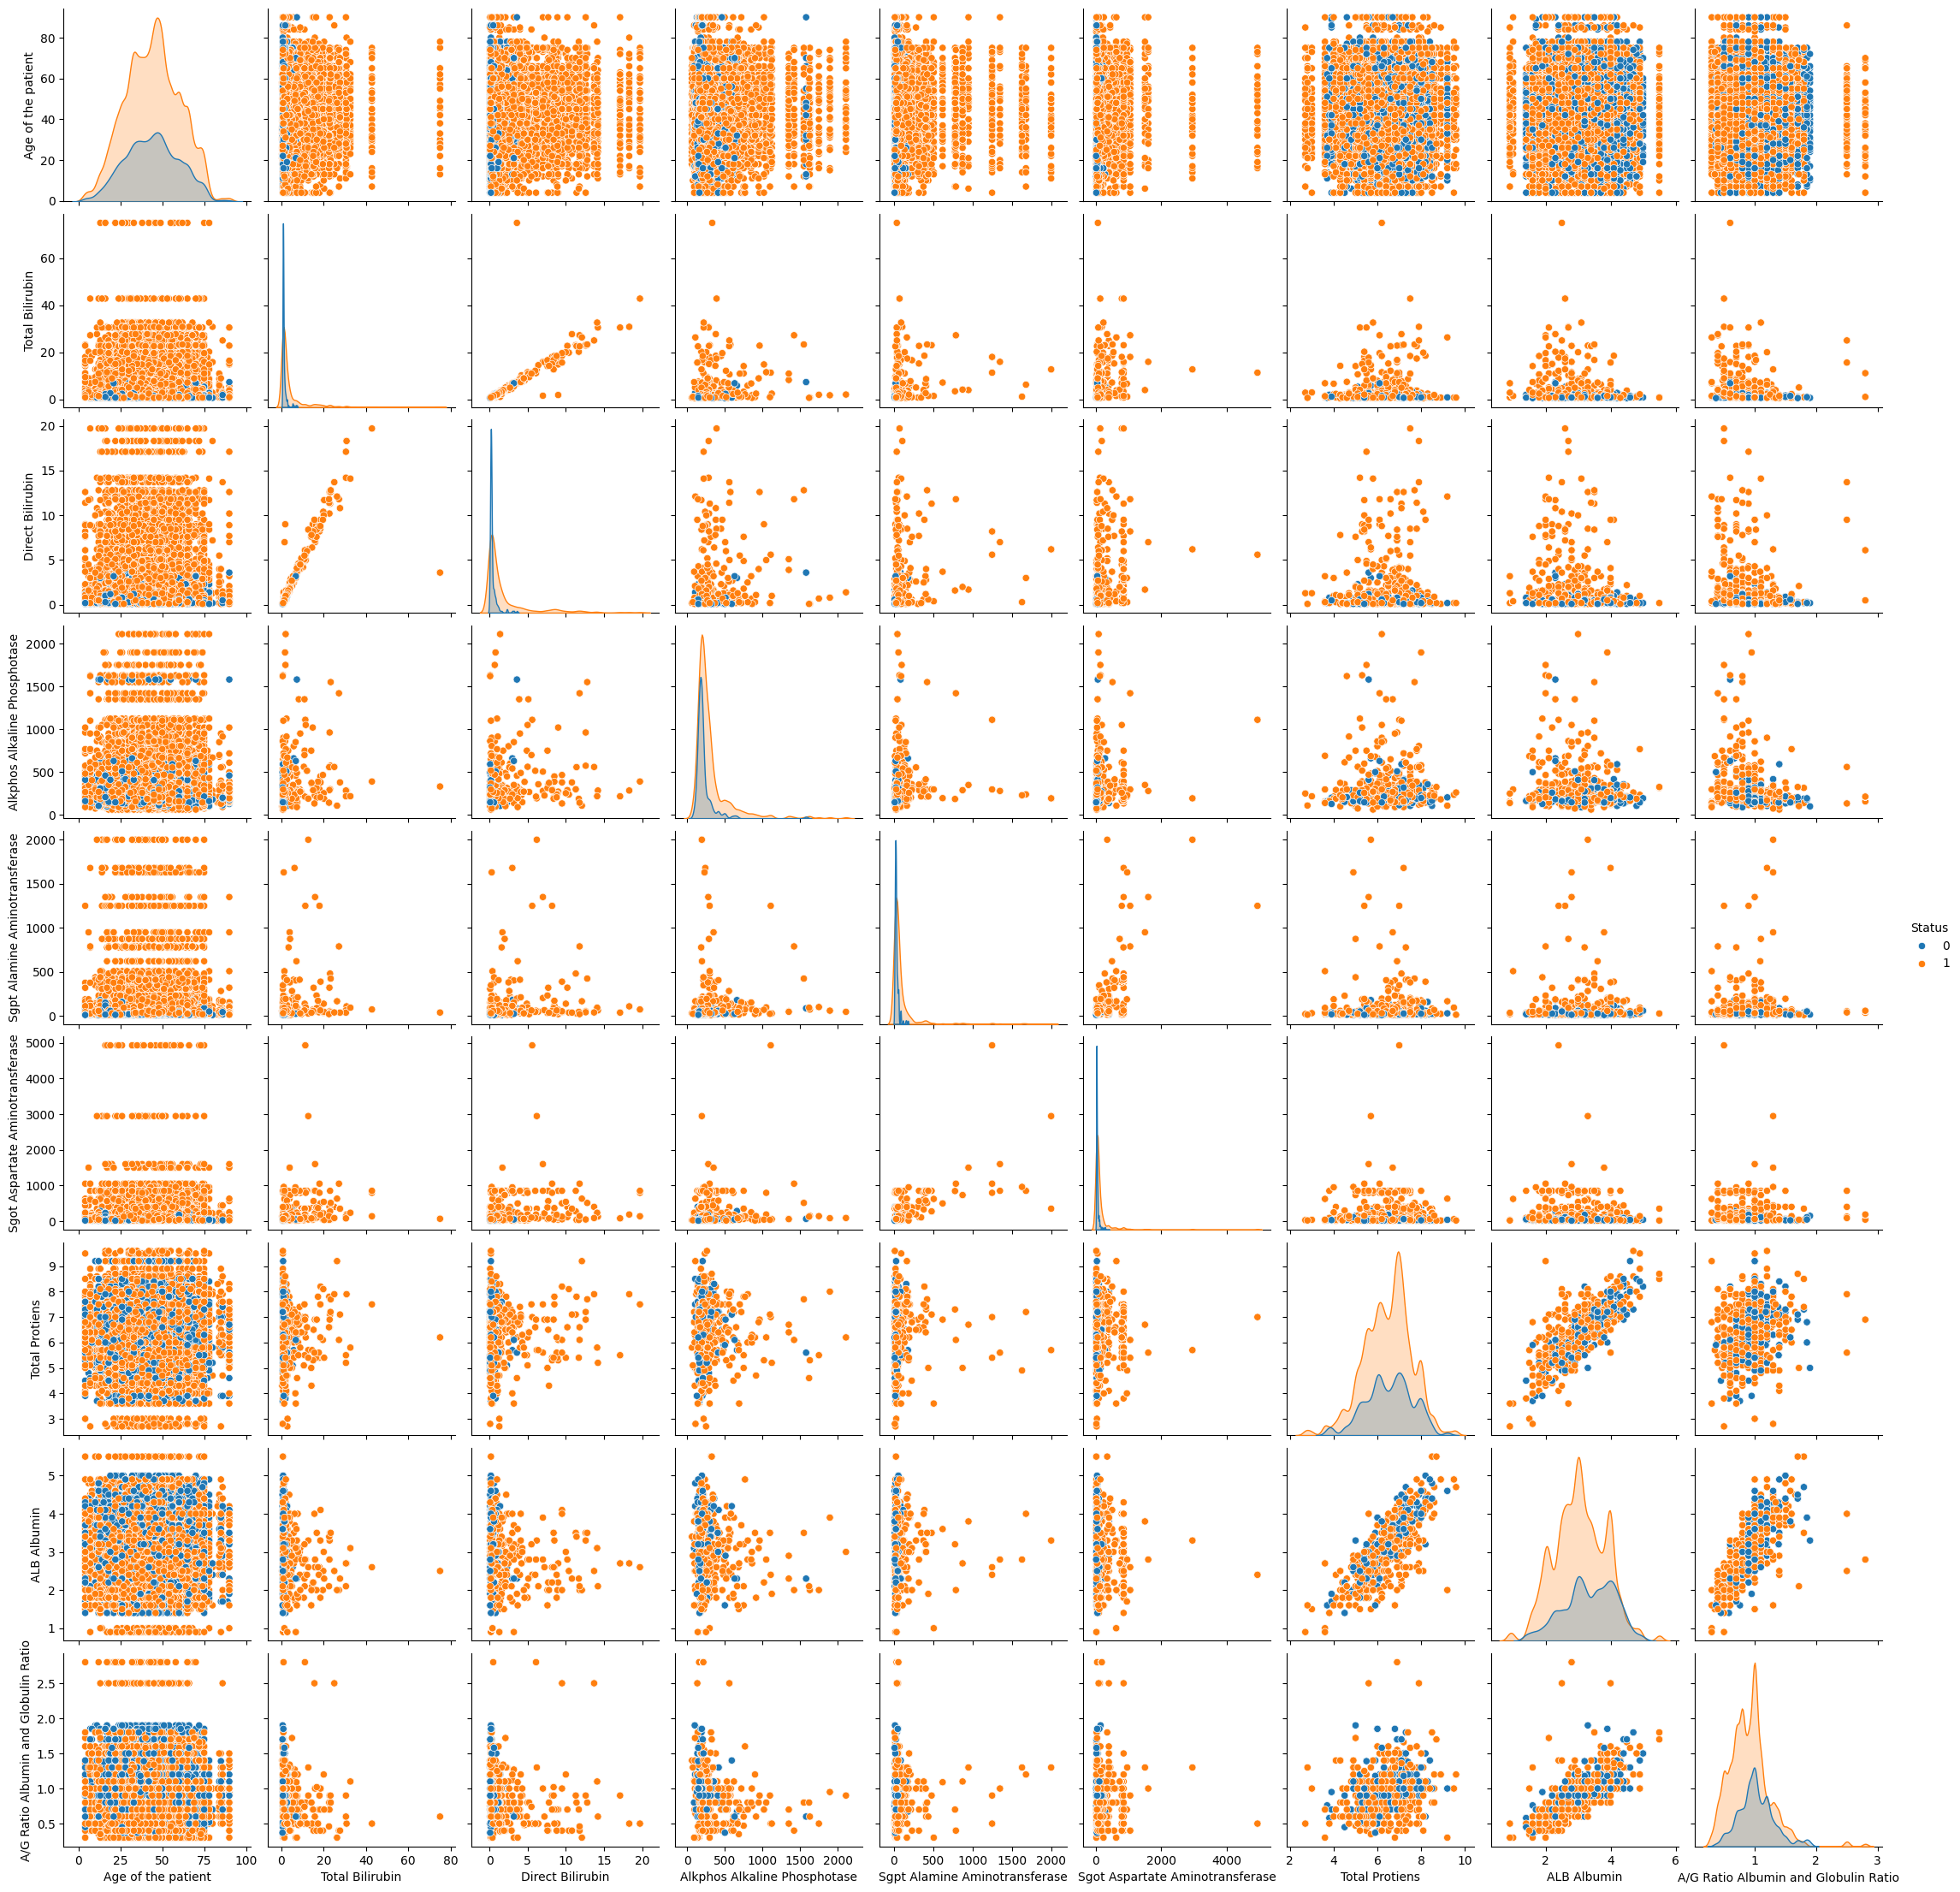

In [ ]:
sns.pairplot(merge_data,hue="Status",diag_kind='kde')

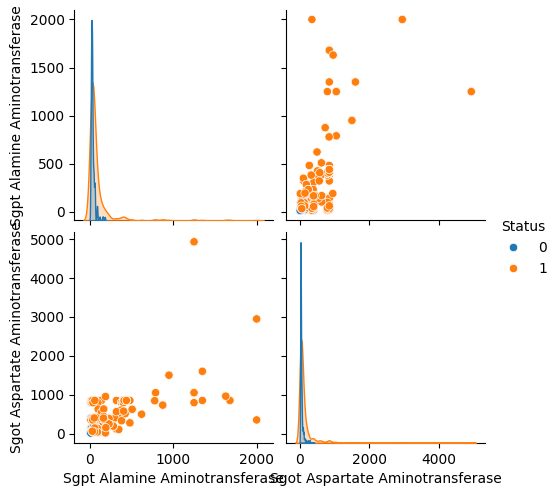

In [ ]:
sns.pairplot(merge_data[["Status","Sgpt Alamine Aminotransferase","Sgot Aspartate Aminotransferase"]],hue="Status",diag_kind='kde')

In [ ]:
merge_data["sgpt/sgot"]=merge_data["Sgpt Alamine Aminotransferase"]/merge_data["Sgot Aspartate Aminotransferase"]

In [63]:
sns.histplot(merge_data[["Status","sgpt/sgot"]],x="sgpt/sgot",hue="Status")

KeyError: "['sgpt/sgot'] not in index"

In [64]:
crr=merge_data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(crr,annot=True , cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'